In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import cv2
import glob
import os
IMG_SIZE = 112

In [2]:
print(len(os.listdir("./data/train/0")),
len(os.listdir("./data/train/1")),
len(os.listdir("./data/train/2")),
len(os.listdir("./data/train/3")),
len(os.listdir("./data/train/4")))

2286 1046 1516 757 173


In [3]:
print("===Training Data===")
print("Grade 0: ", len(os.listdir("./data/train/0")))
print("Grade 1: ", len(os.listdir("./data/train/1")))
print("Grade 2: ", len(os.listdir("./data/train/2")))
print("Grade 3: ", len(os.listdir("./data/train/3")))
print("Grade 4: ", len(os.listdir("./data/train/4")))

print("===Validation Data===")
print("Grade 0: ", len(os.listdir("./data/val/0")))
print("Grade 1: ", len(os.listdir("./data/val/1")))
print("Grade 2: ", len(os.listdir("./data/val/2")))
print("Grade 3: ", len(os.listdir("./data/val/3")))
print("Grade 4: ", len(os.listdir("./data/val/4")))

print("===Test Data===")
print("Grade 0: ", len(os.listdir("./data/test/0")))
print("Grade 1: ", len(os.listdir("./data/test/1")))
print("Grade 2: ", len(os.listdir("./data/test/2")))
print("Grade 3: ", len(os.listdir("./data/test/3")))
print("Grade 4: ", len(os.listdir("./data/test/4")))

===Training Data===
Grade 0:  2286
Grade 1:  1046
Grade 2:  1516
Grade 3:  757
Grade 4:  173
===Validation Data===
Grade 0:  328
Grade 1:  153
Grade 2:  212
Grade 3:  106
Grade 4:  27
===Test Data===
Grade 0:  639
Grade 1:  296
Grade 2:  447
Grade 3:  223
Grade 4:  51


Grade 0


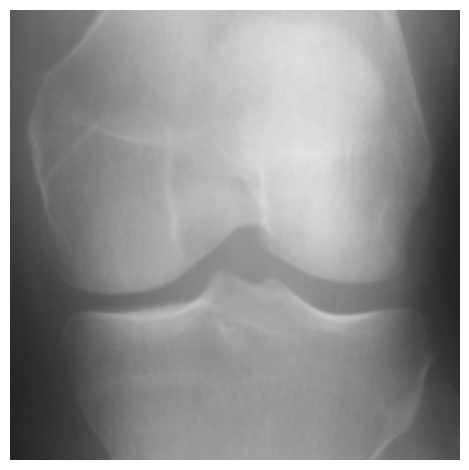

In [4]:
print("Grade 0")

img = cv2.imread(os.path.join("./data/train/0/9001695L.png"))
plt.imshow(img)
plt.axis("off")
plt.tight_layout()

Grade 1


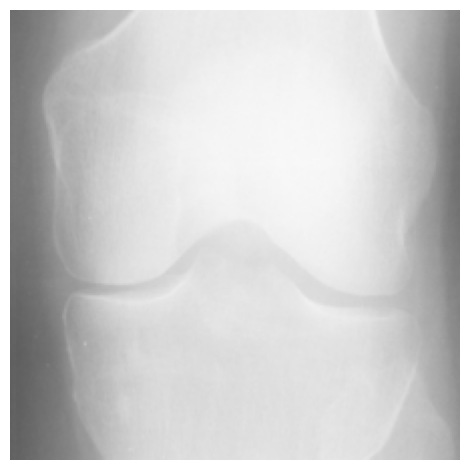

In [5]:
print("Grade 1")

img = cv2.imread(os.path.join("./data/train/1/9000622L.png"))
plt.imshow(img)
plt.axis("off")
plt.tight_layout()

Grade 2


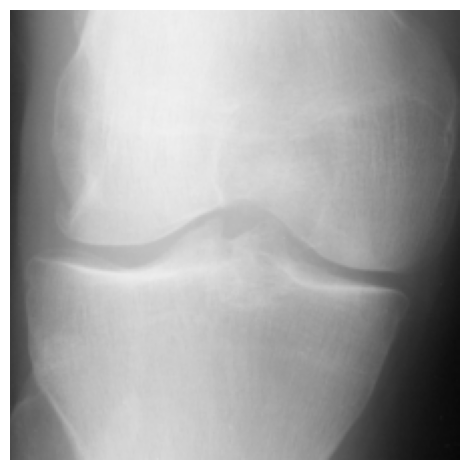

In [6]:
print("Grade 2")

img = cv2.imread(os.path.join("./data/train/2/9000099R.png"))
plt.imshow(img)
plt.axis("off")
plt.tight_layout()

Grade 3


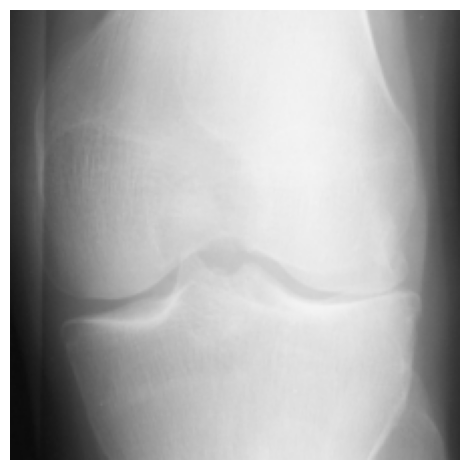

In [7]:
print("Grade 3")

img = cv2.imread(os.path.join("./data/train/3/9000099L.png"))
plt.imshow(img)
plt.axis("off")
plt.tight_layout()

Grade 4


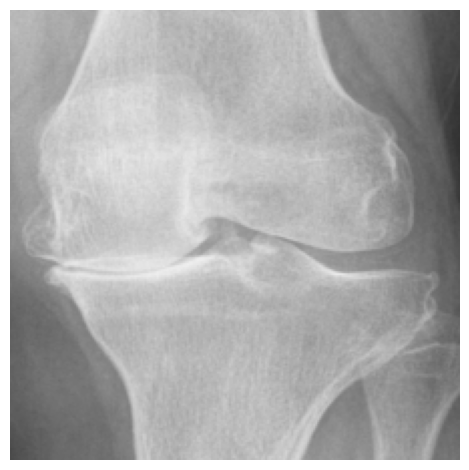

In [8]:
print("Grade 4")

img = cv2.imread(os.path.join("./data/train/4/9025994L.png"))
plt.imshow(img)
plt.axis("off")
plt.tight_layout()

The dimensions of the image 224 pixels width and 224 pixels height, one single color channel


Maximum value: 0.8980392217636108, Minimum value: 0.13725490868091583
The mean value is: 0.5435746908187866 and standard value: 0.1892792284488678


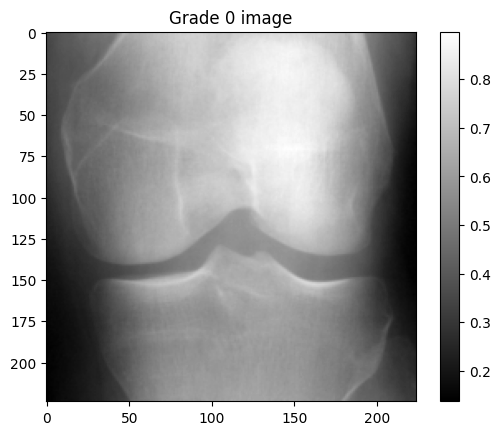

In [9]:
img = os.path.join("./data/train/0/9001695L.png")
img = plt.imread(img)
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.title("Grade 0 image")

print(f"The dimensions of the image {img.shape[0]} pixels width and {img.shape[1]} pixels height, one single color channel")
print(f"Maximum value: {img.max()}, Minimum value: {img.min()}")
print(f"The mean value is: {img.mean()} and standard value: {img.std()}")

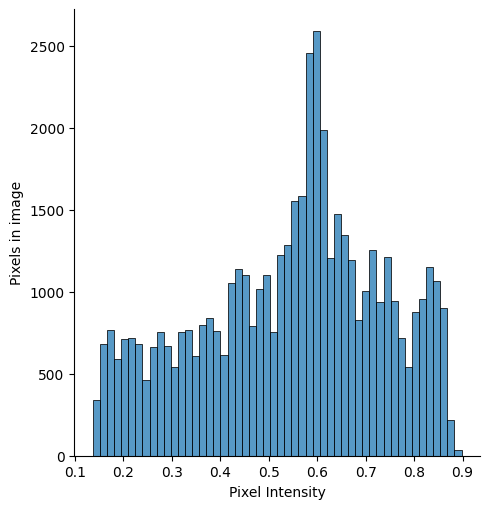

In [10]:
sns.displot(img.ravel(), label=f"Pixel mean value: {np.mean(img)} & standard deviation: {np.std(img)}", kde=False)
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixels in image")
plt.show()

In [11]:
def get_data(path, class_name):
    data = []
    for i in range(0, 5):
        try:
            files = glob.glob(path+"/"+class_name+"/"+str(i)+"/*")
            for f in files:
                img = cv2.imread(f)
                R, G, B = cv2.split(img)
                new_R = cv2.equalizeHist(R)
                new_G = cv2.equalizeHist(G)
                new_B = cv2.equalizeHist(B)
                img = cv2.merge((new_R, new_G, new_B))
                img =  cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                data.append(np.array([np.array(img) / 255.0, i], dtype=object))
        except:
            pass
    np.random.shuffle(data)
    return data

In [12]:
train_data = get_data("data", "train")
train_data = np.array(train_data, dtype=object)
train_data.shape

(5778, 2)

In [13]:
val_data = get_data("data", "val")
val_data = np.array(val_data, dtype=object)
val_data.shape

(826, 2)

In [14]:
test_data = get_data("data", "test")
test_data = np.array(test_data, dtype=object)
test_data.shape

(1656, 2)

In [15]:
train_x = []
train_y = []
for i in range(train_data.shape[0]):
    train_x.append(train_data[i][0])
    train_y.append(train_data[i][1])
train_x = np.array(train_x, ndmin=3)
train_y = np.array(train_y, ndmin=1)

In [16]:
val_x = []
val_y = []
for i in range(val_data.shape[0]):
    val_x.append(val_data[i][0])
    val_y.append(val_data[i][1])
val_x = np.array(val_x, ndmin=3)
val_y = np.array(val_y, ndmin=1)

In [17]:
test_x = []
test_y = []
for i in range(test_data.shape[0]):
    test_x.append(test_data[i][0])
    test_y.append(test_data[i][1])
test_x = np.array(test_x, ndmin=3)
test_y = np.array(test_y, ndmin=1)

In [18]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
lb = LabelBinarizer()
val_y = lb.fit_transform(val_y)
lb = LabelBinarizer()
test_y = lb.fit_transform(test_y)

In [19]:
train_x.shape, train_y.shape, val_x.shape, val_y.shape, test_x.shape, test_y.shape

((5778, 112, 112, 3),
 (5778, 5),
 (826, 112, 112, 3),
 (826, 5),
 (1656, 112, 112, 3),
 (1656, 5))

c:\Users\19138\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


The maximum pixel value is: 1.0 and minimum value is: 0.0
The mean pixel value is: 0.5048468388415431 and standard value is: 0.2896299572891037


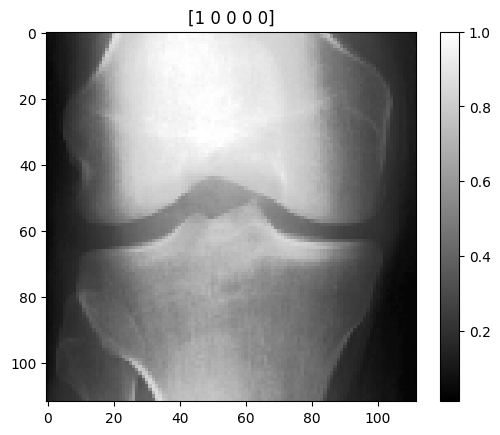

In [20]:
plt.title(train_y[101])
plt.imshow(train_x[101], cmap="gray")
plt.colorbar()

print(f"The maximum pixel value is: {train_x.max()} and minimum value is: {train_x.min()}")
print(f"The mean pixel value is: {train_x.mean()} and standard value is: {train_x.std()}")

In [21]:
# Class weight 
num_0 = len(os.listdir("./data/train/0/"))
num_1 = len(os.listdir("./data/train/1/"))
num_2 = len(os.listdir("./data/train/2/"))
num_3 = len(os.listdir("./data/train/3/"))
num_4 = len(os.listdir("./data/train/4/"))

weight_for_0 = num_0 / (num_0 + num_1 + num_2 + num_3 + num_4)
weight_for_1 = num_1 / (num_0 + num_1 + num_2 + num_3 + num_4)
weight_for_2 = num_2 / (num_0 + num_1 + num_2 + num_3 + num_4)
weight_for_3 = num_3 / (num_0 + num_1 + num_2 + num_3 + num_4)
weight_for_4 = num_4 / (num_0 + num_1 + num_2 + num_3 + num_4)

class_weight = {0: weight_for_0, 1:weight_for_1, 2:weight_for_2, 3:weight_for_3, 4:weight_for_4}
print(class_weight)

{0: 0.3956386292834891, 1: 0.18103149878850813, 2: 0.26237452405676703, 3: 0.1310141917618553, 4: 0.029941156109380408}


In [22]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras import layers

In [31]:
new_model = tf.keras.Sequential([
    tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    Dropout(0.25),
    tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    tf.keras.layers.AveragePooling2D(2),
    tf.keras.layers.AveragePooling2D(2),
    Dropout(0.5),
    tf.keras.layers.Conv2D(128, 3, padding="same", activation="relu"),
    tf.keras.layers.AveragePooling2D(2),
    Dropout(0.75),
    tf.keras.layers.Flatten(),
    Dense(200, activation="relu"),
    Dropout(0.5),
    Dense(5, activation="softmax")
])
new_model.compile( optimizer="adam" , loss="binary_crossentropy" , metrics=["binary_accuracy", tf.keras.metrics.AUC()])

In [32]:
hist = new_model.fit(train_x, train_y, epochs=10 , batch_size=32,
                    validation_data=(val_x,val_y), verbose=1)

Epoch 1/10
181/181 [==============================] - 171s 940ms/step - loss: 0.4663 - binary_accuracy: 0.7884 - auc_1: 0.7029 - val_loss: 0.4560 - val_binary_accuracy: 0.8000 - val_auc_1: 0.7248
Epoch 2/10
181/181 [==============================] - 179s 988ms/step - loss: 0.4563 - binary_accuracy: 0.7877 - auc_1: 0.7115 - val_loss: 0.4514 - val_binary_accuracy: 0.8000 - val_auc_1: 0.7307
Epoch 3/10
181/181 [==============================] - 207s 1s/step - loss: 0.4511 - binary_accuracy: 0.7931 - auc_1: 0.7204 - val_loss: 0.4440 - val_binary_accuracy: 0.8034 - val_auc_1: 0.7358
Epoch 4/10
181/181 [==============================] - 134s 741ms/step - loss: 0.4482 - binary_accuracy: 0.7952 - auc_1: 0.7261 - val_loss: 0.4386 - val_binary_accuracy: 0.8061 - val_auc_1: 0.7491
Epoch 5/10
181/181 [==============================] - 129s 716ms/step - loss: 0.4389 - binary_accuracy: 0.7998 - auc_1: 0.7411 - val_loss: 0.4239 - val_binary_accuracy: 0.8119 - val_auc_1: 0.7825
Epoch 6/10
181/181 [===

In [37]:
test_pred = new_model.predict(test_x)

52/52 [==============================] - 7s 137ms/step


In [39]:
from sklearn.metrics import log_loss
print(log_loss(test_y, test_pred))

1.1341758692808053


In [40]:
test_pred_y = []
for i in range(test_pred.shape[0]):
    test_pred_y.append(np.argmax(test_pred[i]))

In [44]:
test_new_y = []
for i in range(test_y.shape[0]):
    test_new_y.append(np.argmax(test_y[i]))

In [86]:
sum_val = np.sum(tf.keras.metrics.binary_accuracy(test_y, test_pred))

In [87]:
sum_val

1359.0

In [88]:
print(f"Binary Accuracy for the test set: {sum_val / test_y.shape[0]}")

Binary Accuracy for the training set: 0.8206521739130435


In [89]:
import os.path
if os.path.isfile('models/new_model.h5') is False:
    new_model.save('models/new_model.h5')

In [90]:
from tensorflow.keras.models import load_model
loaded_model = load_model('models/new_model.h5')

In [91]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 56, 56, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 64)        18496     
                                                      

In [92]:
print(np.sum(tf.keras.metrics.binary_accuracy(test_y, loaded_model.predict(test_x))) / test_y.shape[0])

52/52 [==============================] - 8s 147ms/step
0.8206521739130435
